# IMPORT LIBRARIES USED

In [34]:
import csv
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow import keras

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# SPECIFY THE PATH USED

## *Path to current directory*

In [35]:
full_path = os.path.abspath('')
full_path

'e:\\Games\\UnityProject\\HandDetection\\hand-gesture-recognition-using-mediapipe-main'

## *Path to dataset*

In [36]:
dataset = os.path.join(full_path, 'model/keypoint_classifier/keypoint.csv')
dataset = os.path.normpath(dataset)
dataset

'e:\\Games\\UnityProject\\HandDetection\\hand-gesture-recognition-using-mediapipe-main\\model\\keypoint_classifier\\keypoint.csv'

## *Path to where the model is saved*

In [37]:
model_save_path = os.path.join(full_path, 'model/keypoint_classifier/keypoint_classifier.keras')
model_save_path = os.path.normpath(model_save_path)
model_save_path

'e:\\Games\\UnityProject\\HandDetection\\hand-gesture-recognition-using-mediapipe-main\\model\\keypoint_classifier\\keypoint_classifier.keras'

## *Path to the folder where the model is saved*

In [38]:
saved_model_path = os.path.join(full_path, 'model/keypoint_classifier')
saved_model_path = os.path.normpath(saved_model_path)
saved_model_path

'e:\\Games\\UnityProject\\HandDetection\\hand-gesture-recognition-using-mediapipe-main\\model\\keypoint_classifier'

## *Path to TfLite model*

In [39]:
tflite_save_path = os.path.join(full_path, 'model/keypoint_classifier/keypoint_classifier.tflite')
tflite_save_path = os.path.normpath(tflite_save_path)
tflite_save_path

'e:\\Games\\UnityProject\\HandDetection\\hand-gesture-recognition-using-mediapipe-main\\model\\keypoint_classifier\\keypoint_classifier.tflite'

# SET THE CLASSIFICATION NUMBER

In [40]:
NUM_CLASSES = 4

# LOAD DATA FOR LEARNING

## *Load data without dependency*

In [41]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

## *Load dependent data (**Label**)*

In [42]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

## *Split the dataset*

### *Value for random state*

In [43]:
RANDOM_SEED = 42

### *Splitting the dataset*

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# CONFIGURE THE LEARNING MODEL

## *Set up model structure*

* Model structure:
> 1. Input Layer
> 2. Dropout(0.2)
> 3. Fully-connected-20 with ReLU as activation
> 4. Dropout(0.4)
> 5. Fully-connected-10 with ReLU as activation
> 6. Fully-connected-4 with SoftMax as activation

In [91]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])
model.name = "Hand_Posture_Regconize_Model"

## *Model summary*

### *Table*

In [92]:
model.summary()  

Model: "Hand_Posture_Regconize_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_11 (Dropout)            │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 4)              │            44 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,224 (4.78 KB)

 Trainable params: 1,224 (4.78 KB)

 Non-trainable params: 0 (0.00 B)

### *Graph*

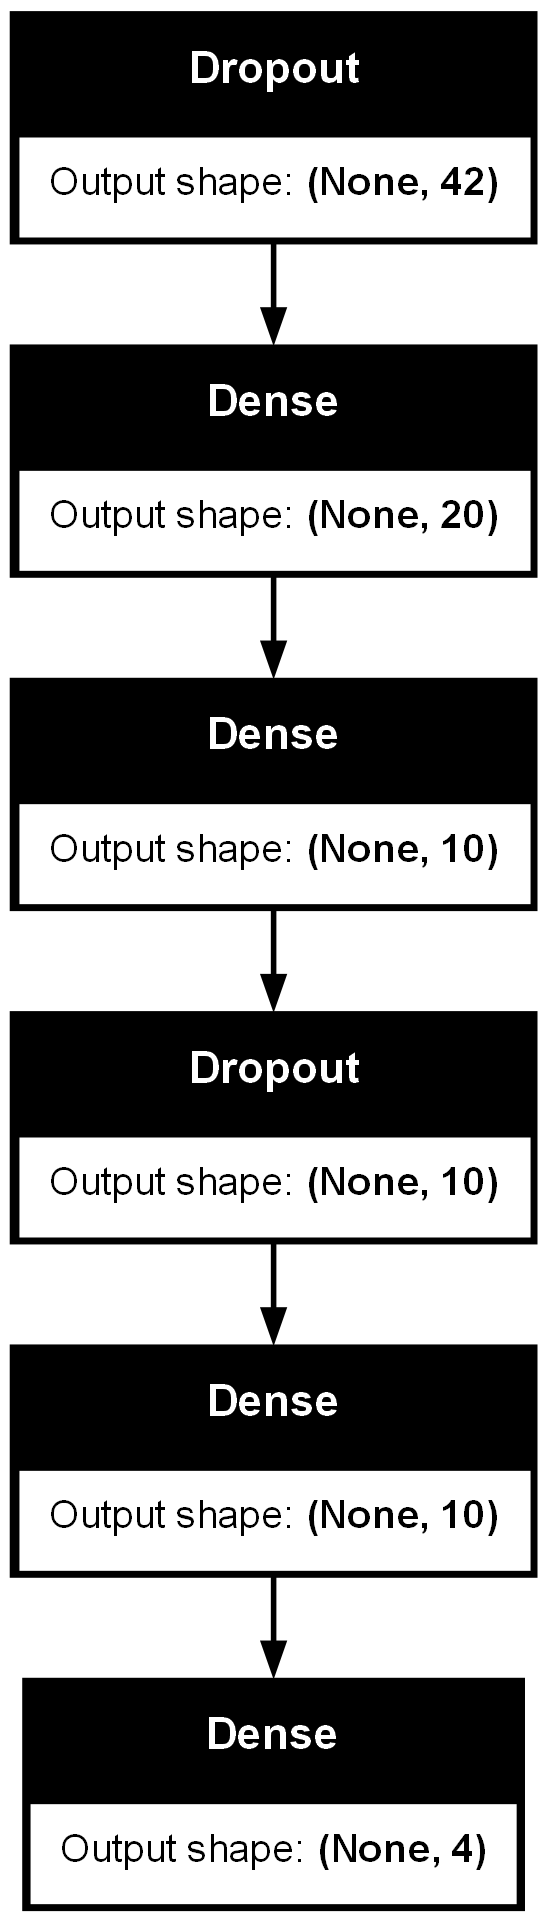

In [93]:
tf.keras.utils.plot_model(model, show_shapes=True)

## *Set up callbacks for the model*

### *Model checkpoint callback*

In [94]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)

### *Model early stopping callback*

In [95]:
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

## *Model compilation*

In [96]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# MODEL TRAINING

In [97]:
history = model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/36 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.2656 - loss: 1.4079
Epoch 1: saving model to e:\Games\UnityProject\HandDetection\hand-gesture-recognition-using-mediapipe-main\model\keypoint_classifier\keypoint_classifier.keras
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.3379 - loss: 1.3495 - val_accuracy: 0.5284 - val_loss: 1.1664
Epoch 2/1000
 1/36 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4219 - loss: 1.2580
Epoch 2: saving model to e:\Games\UnityProject\HandDetection\hand-gesture-recognition-using-mediapipe-main\model\keypoint_classifier\keypoint_classifier.keras
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4300 - loss: 1.2291 - val_accuracy: 0.5258 - val_loss: 1.0650
Epoch 3/1000
 1/36 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4922 - loss: 1.1728
Epoch 3: saving model to e:\Games\UnityProject\HandDetection\hand-gesture-recognition-using-mediapipe-main\model\keypoint_classifier\keypoint_classifier.keras
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms

# MODEL EVALUATION

## *Evaluate validation results*

In [98]:
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9909 - loss: 0.0859 


## *Prediction test*

### *Loading a saved model*

In [99]:
model = tf.keras.models.load_model(model_save_path)

### *Prediction testing*

In [100]:
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
[0.00923503 0.05125031 0.9381416  0.00137309]
2


# CONFUSION MATRIX

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step


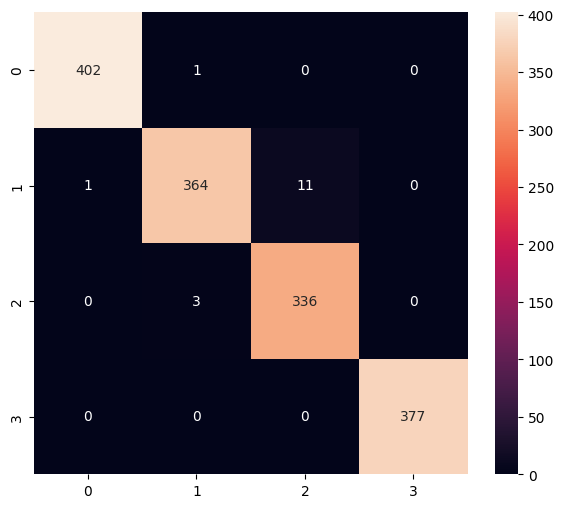

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       403
           1       0.99      0.97      0.98       376
           2       0.97      0.99      0.98       339
           3       1.00      1.00      1.00       377

    accuracy                           0.99      1495
   macro avg       0.99      0.99      0.99      1495
weighted avg       0.99      0.99      0.99      1495



In [101]:
def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# TRAINING HISTORY OF THE MODEL

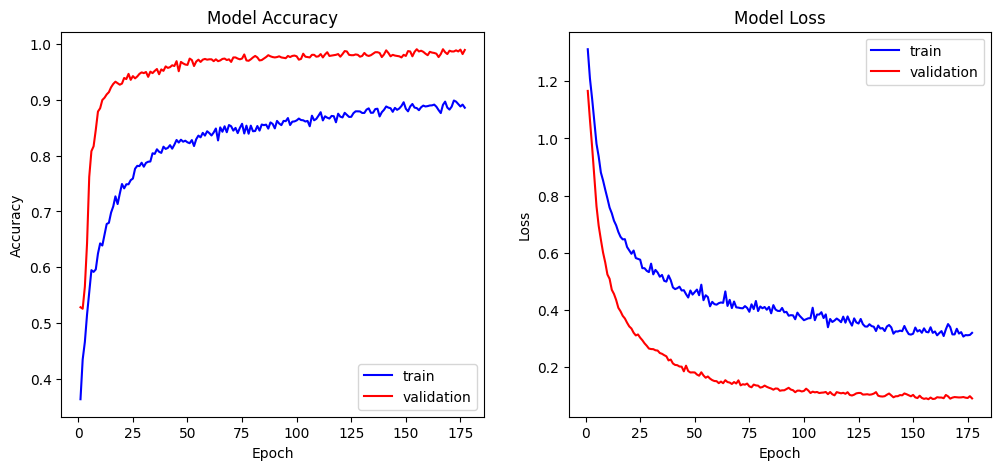

In [102]:
def plot_history(history):
    acc = history.history["accuracy"]
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    val_accuracy = history.history["val_accuracy"]
    
    x = range(1, len(acc) + 1)
    
    plt.figure(figsize=(12,5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, "b", label="train")
    plt.plot(x, val_accuracy, "r", label="validation")
    plt.legend(loc="best")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title("Model Accuracy")
    
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, "b", label="train")
    plt.plot(x, val_loss, "r", label="validation")
    plt.legend(loc="best")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Model Loss")
    
plot_history(history)

# MODEL CONVERTING FOR TensorFlow-Lite

## *Model export*

In [103]:
# model.save(model_save_path, include_optimizer=False)
model.export(filepath=saved_model_path, format="tf_saved_model")


INFO:tensorflow:Assets written to: e:\Games\UnityProject\HandDetection\hand-gesture-recognition-using-mediapipe-main\model\keypoint_classifier\assets


INFO:tensorflow:Assets written to: e:\Games\UnityProject\HandDetection\hand-gesture-recognition-using-mediapipe-main\model\keypoint_classifier\assets


Saved artifact at 'e:\Games\UnityProject\HandDetection\hand-gesture-recognition-using-mediapipe-main\model\keypoint_classifier'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer_5')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  2549086921728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2549086922432: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2549086916096: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2549086923488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2549086912576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2549086916800: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2549086913280: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2549086913632: TensorSpec(shape=(), dtype=tf.resource, name=None)


## *Load the exported model*

In [104]:
model = tf.keras.models.load_model(model_save_path)

## *Transform the model (**quantize**)*

In [105]:
# converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_path)

converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_ops = [
  tf.lite.OpsSet.TFLITE_BUILTINS, # enable TensorFlow Lite ops.
  tf.lite.OpsSet.SELECT_TF_OPS # enable TensorFlow ops.
]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

7740

# REASONING TEST

## *Set up an interpreter*

In [106]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

## *Get input tensor*

In [107]:
input_details = interpreter.get_input_details()

## *Get output tensor*

In [108]:
output_details = interpreter.get_output_details()

## *Set the value for the input tensor*

In [109]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

## *Inference implementation*

In [110]:
%%time
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 219 µs


## *Print the results*

In [111]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[0.00923503 0.05125031 0.9381416  0.00137309]
2
